<a href="https://colab.research.google.com/github/Aniruddha-Kulkarni/US-accidents/blob/master/CA683_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SEVERITY PREDICTION FOR U.S ACCIDENTS DATASET**

The Dataset is downloaded from Kaggle, this dataset includes accidents data from 2016-2019 from various states of US. Dataset gives the details of the accident including all the factors like Temperature, Visibillity, WindSpeed, and Location of the accident.This data is collected using variety of entities like law enforcement agencies, cameras and sensors. The description of accident is given in the dataset to elaborate the conditions of accidents. The severity of accidents depends on various factors like the speed of vehicle and visibility during the time accident happened.

The severity here measures the congestion caused in traffic because of the accident that just took place. The factors like the location, speed visibility, wind speed and wind direction and day time are provided in the dataset. With these factors we will create new features using PCA, we have both categorical and continous features, hence PCA is implemented on the dataset 

We as a team have performed the EDA on the dataset in this collab. The Collab also includes the models implemented and ROC curve with accuracy and confustion matrix. Please refer below file for more details

# Part 1 - Importing Data
 - Upload the CSV in Google Drive. 
- Import all the necessary packages required for plotting the data and pre processing the data
- Import and check the data in a datframe 



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# import studio.plotly as py
import plotly.tools as tls

import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
print(sns.axes_style)

<function axes_style at 0x7f3510323158>


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Steps taken to clean the data

- Reading the CSV File 
- Print and check the head() of data.


In [0]:
df = pd.read_csv('drive/My Drive/US_Accidents_Dec19.csv')

In [0]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


#Part 2 : Data Pre-Processing

- Check all the data types of all the coloumn
- Check the mean mode and other summary statistics of data
- Check the number of null values in the coloumn
- Value_Counts of the predictor variable, 

- Take the Major cities (CA,TX,FL,NY & SC) into consideration as majorly all the accidents have occured in these cities.
- In Data cleaning, the Calm and 'CALM' variables are diffeernt, this might distort the data, hence we need to make those variable same.
- The missing values in the selected coloums for analysis are filled up using the imputer of mean for the continous variable by checking the boxplot and mode for the categorical variables
- All the variables are then turned into encoding uing LabelEncoder(), even binary are converted to 0 and 1.


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMC,2246264.0,207.831632,20.329586,200.000000,201.000000,201.000000,201.000000,4.060000e+02
Severity,2974335.0,2.360190,0.541473,1.000000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,2974335.0,36.493605,4.918849,24.555269,33.550402,35.849689,40.370260,4.900220e+01
Start_Lng,2974335.0,-95.426254,17.218806,-124.623833,-117.291985,-90.250832,-80.918915,-6.711317e+01
End_Lat,728071.0,37.580871,5.004757,24.570110,33.957554,37.903670,41.372630,4.907500e+01
End_Lng,728071.0,-99.976032,18.416647,-124.497829,-118.286610,-96.631690,-82.323850,-6.710924e+01
Distance(mi),2974335.0,0.285565,1.548392,0.000000,0.000000,0.000000,0.010000,3.336300e+02
Number,1056730.0,5837.003544,15159.278074,0.000000,837.000000,2717.000000,7000.000000,9.999997e+06
Temperature(F),2918272.0,62.351203,18.788549,-77.800000,50.000000,64.400000,76.000000,1.706000e+02
Wind_Chill(F),1121712.0,51.326849,25.191271,-65.900000,32.000000,54.000000,73.000000,1.150000e+02


In [0]:
df.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

- Select the number of states having highest value of accidents

In [0]:
subset_DS = df[(df['State'] == 'CA') | (df['State'] == 'TX') | (df['State'] == 'FL') | (df['State'] == 'NY') | (df['State'] == 'SC') ]


- Part 2 (contd.) Data Preprocessing

1.   In Wind Direction we can see various number of values with same name like 'Calm' & 'CALM' are different but ideally they should be same.
2.   Replaced those values making Calm and CALM to be treated as same categorical variable
3.   Similarly other values like VAR, North, South, East & West.




In [0]:
subset_DS['Wind_Direction'] = subset_DS['Wind_Direction'].replace(['CALM'],'Calm')
subset_DS['Wind_Direction'] = subset_DS['Wind_Direction'].replace(['Variable'],'VAR')
subset_DS['Wind_Direction'] = subset_DS['Wind_Direction'].replace(['N'],'North')
subset_DS['Wind_Direction'] = subset_DS['Wind_Direction'].replace(['S'],'South')
subset_DS['Wind_Direction'] = subset_DS['Wind_Direction'].replace(['E'],'East')
subset_DS['Wind_Direction'] = subset_DS['Wind_Direction'].replace(['W'],'West')

subset_DS['Wind_Direction'].value_counts()

Calm     273115
West     113637
South    109020
VAR       90048
North     83282
SSE       70691
East      70683
SSW       70108
WSW       69867
WNW       68182
SW        66825
SE        59612
NW        57682
NNW       52323
ESE       51858
NE        48246
ENE       48224
NNE       43599
Name: Wind_Direction, dtype: int64

In [0]:
subset_DS['Wind_Direction'].value_counts()

Calm     273115
West     113637
South    109020
VAR       90048
North     83282
SSE       70691
East      70683
SSW       70108
WSW       69867
WNW       68182
SW        66825
SE        59612
NW        57682
NNW       52323
ESE       51858
NE        48246
ENE       48224
NNE       43599
Name: Wind_Direction, dtype: int64

~ LABEL ENCODING for Categorical and continous variables


*   The categorical variables are replaced by mode values in the below cells
*   The continous variables are replaced by the mean values of differnt coloums like Temperature, Humidity, Pressure and Visibility.
*   After replacing the categorical variables and continous variables by mode and mean, we will label all the variables using label_encoder()



In [0]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
# subset_DS['City'].value_counts().tail(50)
#subset_DS['Sunrise_Sunset']=label_encoder.fit_transform(subset_DS['Sunrise_Sunset'].astype(str))


In [0]:
subset_DS1 = subset_DS.filter(['Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','State','Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [0]:
subset_DS1['Temperature(F)'] = subset_DS1['Temperature(F)'].fillna(subset_DS1['Temperature(F)'].mean())
subset_DS1['Humidity(%)'] = subset_DS1['Humidity(%)'].fillna(subset_DS1['Humidity(%)'].mean())
subset_DS1['Pressure(in)'] = subset_DS1['Pressure(in)'].fillna(subset_DS1['Pressure(in)'].mean())
subset_DS1['Visibility(mi)'] = subset_DS1['Visibility(mi)'].fillna(subset_DS1['Visibility(mi)'].mean())



In [0]:
subset_DS1['Wind_Direction'] = subset_DS1['Wind_Direction'].fillna(subset_DS1['Wind_Direction'].mode().iloc[0])
subset_DS1['Weather_Condition'] = subset_DS1['Weather_Condition'].fillna(subset_DS1['Weather_Condition'].mode().iloc[0])
subset_DS1['Civil_Twilight'] = subset_DS1['Civil_Twilight'].fillna(subset_DS1['Civil_Twilight'].mode().iloc[0])
subset_DS1['Nautical_Twilight'] = subset_DS1['Nautical_Twilight'].fillna(subset_DS1['Nautical_Twilight'].mode().iloc[0])
subset_DS1['Astronomical_Twilight'] = subset_DS1['Astronomical_Twilight'].fillna(subset_DS1['Astronomical_Twilight'].mode().iloc[0])

In [0]:

subset_DS1['State']=label_encoder.fit_transform(subset_DS1['State'].astype(str))
subset_DS1['Wind_Direction']=label_encoder.fit_transform(subset_DS1['Wind_Direction'].astype(str))
subset_DS1['Weather_Condition']=label_encoder.fit_transform(subset_DS1['Weather_Condition'].astype(str))



subset_DS1['Amenity']=label_encoder.fit_transform(subset_DS1['Amenity'])
subset_DS1['Bump']=label_encoder.fit_transform(subset_DS1['Bump'])
subset_DS1['Crossing']=label_encoder.fit_transform(subset_DS1['Crossing'])
subset_DS1['Give_Way']=label_encoder.fit_transform(subset_DS1['Give_Way'])
subset_DS1['Junction']=label_encoder.fit_transform(subset_DS1['Junction'])
subset_DS1['No_Exit']=label_encoder.fit_transform(subset_DS1['No_Exit'])
subset_DS1['Railway']=label_encoder.fit_transform(subset_DS1['Railway'])
subset_DS1['Roundabout']=label_encoder.fit_transform(subset_DS1['Roundabout'])
subset_DS1['Station']=label_encoder.fit_transform(subset_DS1['Station'])
subset_DS1['Stop']=label_encoder.fit_transform(subset_DS1['Stop'])
subset_DS1['Traffic_Calming']=label_encoder.fit_transform(subset_DS1['Traffic_Calming'])
subset_DS1['Traffic_Signal']=label_encoder.fit_transform(subset_DS1['Traffic_Signal'])
subset_DS1['Turning_Loop']=label_encoder.fit_transform(subset_DS1['Turning_Loop'])

subset_DS1['Sunrise_Sunset']=label_encoder.fit_transform(subset_DS1['Sunrise_Sunset'].astype(str))
subset_DS1['Civil_Twilight']=label_encoder.fit_transform(subset_DS1['Civil_Twilight'].astype(str))
subset_DS1['Nautical_Twilight']=label_encoder.fit_transform(subset_DS1['Nautical_Twilight'].astype(str))
subset_DS1['Astronomical_Twilight']=label_encoder.fit_transform(subset_DS1['Astronomical_Twilight'].astype(str))


In [0]:
subset_DS1.isnull().sum()

Distance(mi)             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
State                    0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

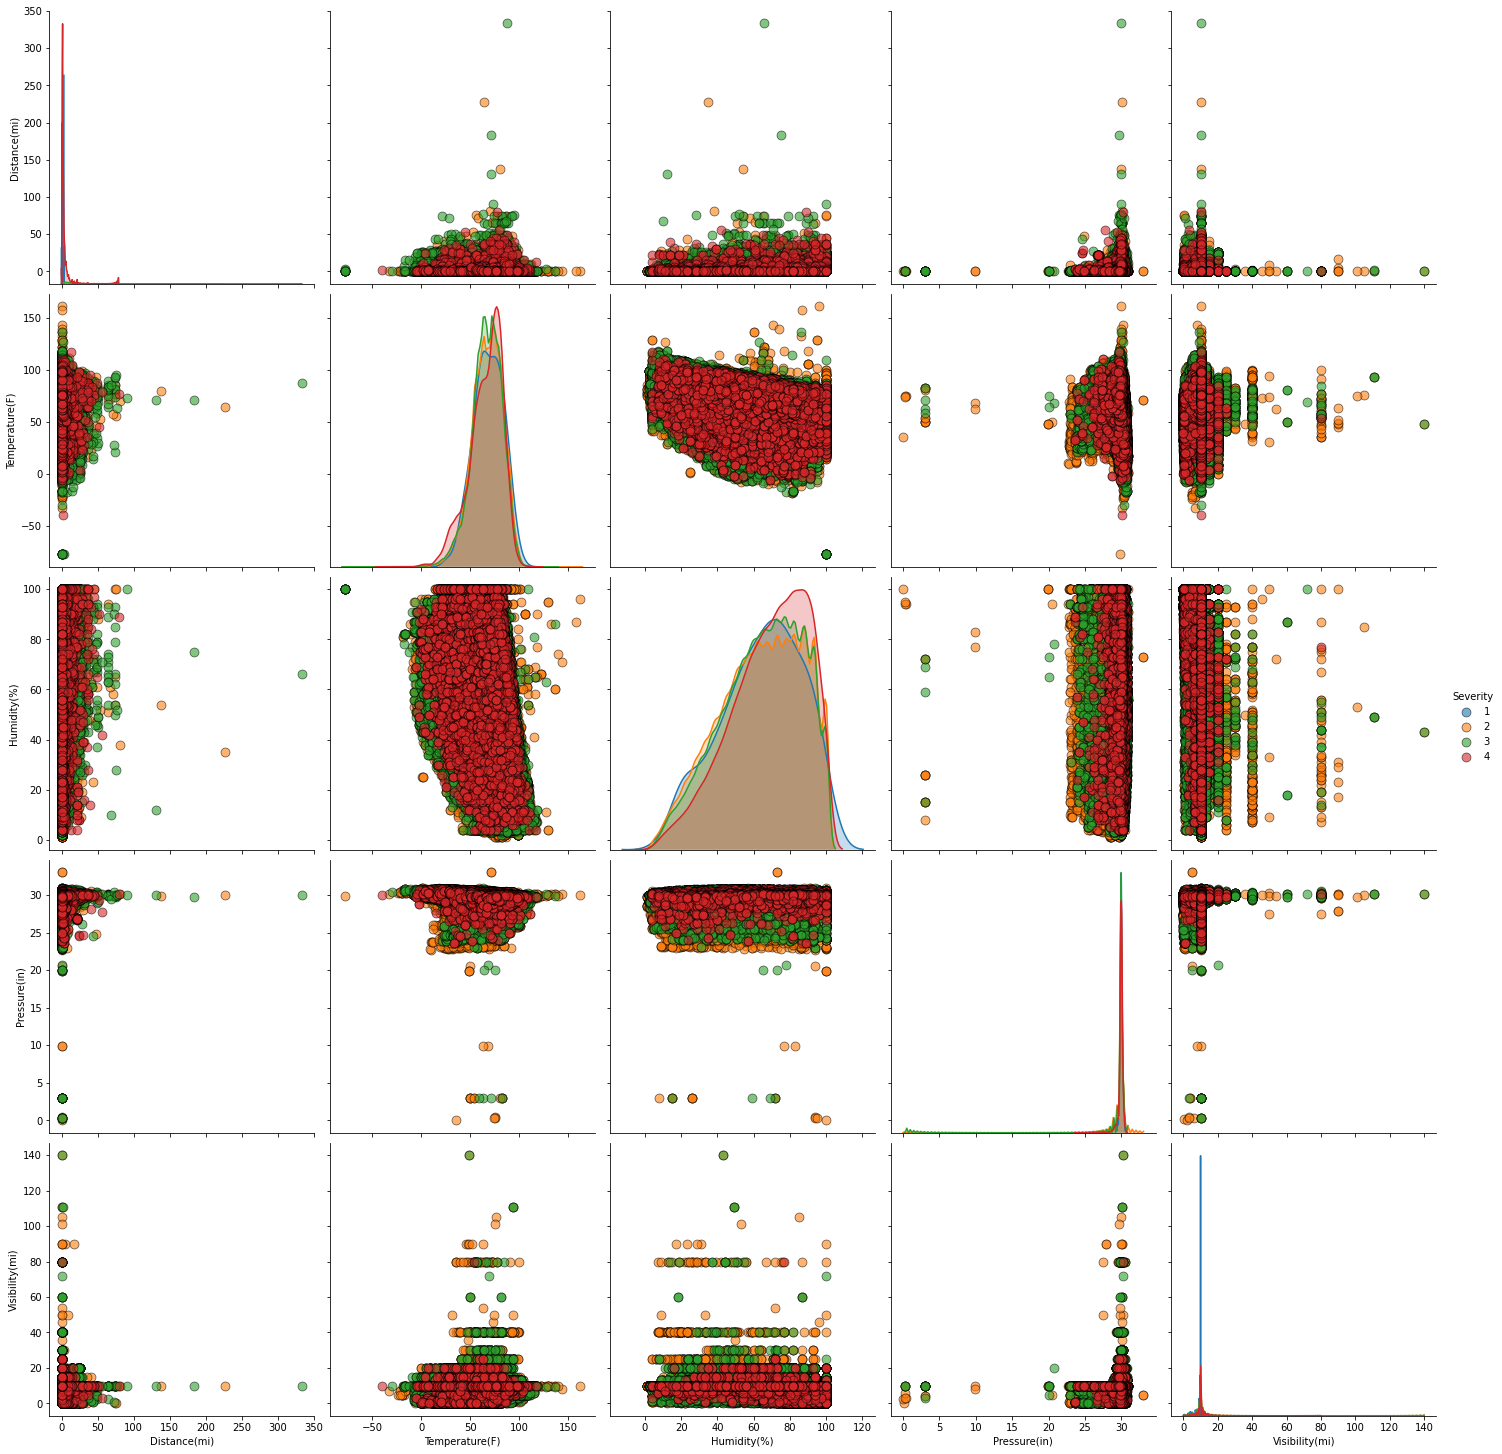

In [0]:
sns.pairplot(subset_DS, 
             vars = ['Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)'], 
             hue = 'Severity', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Part 3 - Feature Enginieering

**PCA - Principal Component Analysis**

We have used the PCA on the all the categorical and continous features after label encoding of the features and scaling them in equal ways.
- Looking at the results from explained variance ratio graph we can see that 15 new features are created which covers almost 91% of the data. 

In [0]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#df_transform = StandardScaler().fit_transform(subset_DS1)
#pca = PCA(n_components=8).fit_transform(df_transform)
#X_reduced = pca.fit_transform(df_transform))

df_transform = StandardScaler().fit_transform(subset_DS1)
pca = PCA(n_components=15).fit(df_transform)
new_df = pca.transform(df_transform)
var_exp = pca.explained_variance_ratio_

In [0]:
var_exp

array([0.15231498, 0.07303014, 0.07132917, 0.06742245, 0.05061146,
       0.04507632, 0.044085  , 0.04315148, 0.04274413, 0.041725  ,
       0.0416804 , 0.04078857, 0.04006402, 0.03722346, 0.03639025])

In [0]:

#variance = X_reduced.explained_variance_ratio_ #calculate variance ratios


#explained_variance = np.var(X_reduced, axis=0)
#explained_variance_ratio = explained_variance / np.sum(explained_variance)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)


In [0]:
var

array([15.2, 22.5, 29.6, 36.3, 41.4, 45.9, 50.3, 54.6, 58.9, 63.1, 67.3,
       71.4, 75.4, 79.1, 82.7])

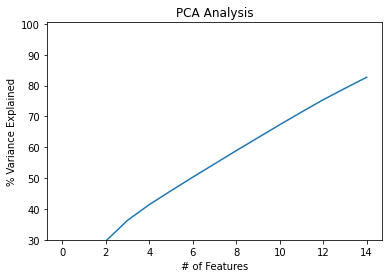

In [0]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [0]:
ax = pd.DataFrame(new_df,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15'])

In [0]:
subset_DS.reset_index(drop=True, inplace=True)
ax.reset_index(drop=True, inplace=True)

In [0]:
finalDf = pd.concat([ax, subset_DS[['Severity']]], axis = 1)

In [0]:
finalDf

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,Severity
0,-1.229753,-0.739847,1.012082,0.712649,0.410866,-0.257024,-0.092308,-0.164345,-0.040082,-0.054996,-0.051807,-0.243548,-0.105830,0.626183,0.838869,3
1,-1.269045,-0.752415,1.033870,0.745774,0.405555,-0.186640,0.040794,-0.061669,-0.009424,-0.076864,-0.062624,-0.379418,-0.160868,0.716823,1.030504,3
2,-1.318683,-0.798649,1.137083,1.032804,0.301206,-0.507743,-0.346664,-0.710661,-0.465056,0.027061,-0.042440,0.202746,0.039961,0.291503,0.013927,2
3,-1.050805,-0.627700,0.830799,0.475698,0.462110,-0.596619,-0.317581,-0.823367,-0.574432,0.028830,-0.060011,0.188830,0.041215,0.322837,0.096519,3
4,-1.287516,-0.780248,1.084722,0.841483,0.401825,-0.268586,-0.005483,-0.219527,-0.150447,-0.059850,-0.066360,-0.272688,-0.125980,0.644920,0.857427,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469495,-1.576049,-1.065318,1.539122,1.479913,0.020785,0.177991,-1.082028,0.940546,1.583965,-0.170309,0.169540,0.542189,0.122401,0.283190,0.437561,2
1469496,-0.941247,-0.619267,0.763739,0.160961,0.432345,-0.186888,-0.772487,0.243805,0.757644,-0.101545,0.067794,0.341189,0.083197,0.372751,0.509841,2
1469497,-1.015654,-0.862276,0.906324,-0.593142,0.891136,0.225321,1.794920,0.882143,0.974233,0.097014,0.015256,-0.759980,1.016439,-1.599499,-0.547926,2
1469498,-0.874559,-0.536059,0.616771,-0.091907,0.472440,-0.147687,-0.381239,0.183679,0.500961,-0.229526,0.028935,0.478711,-0.012351,0.441767,0.649898,2


 # Part 4 : Applying Machine Learning Models

- After splitting the main dataset into train and test, we have applied few machine learning models to check and compare the accuracy and other features related to it.

- Below is the list of models applied :
  - Desicion Tree Classifier
  - KNN - K-Nearest Neighbour
  - Multinomial Logistic Regression

  With the above models we have predicted the value of the test dataset. Please refer cells to check the result for the same.

In [0]:
from sklearn.model_selection import train_test_split
RSEED = 30

X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Severity', axis=1), finalDf['Severity'], test_size=0.33, random_state=66)

In [0]:
y_train.size

984565

# Model -  DESICION TREE CLASSFIER
 


In [0]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=None,min_samples_leaf=1)
history = Classifier.fit(X_train,y_train)

In [0]:
from sklearn.tree import export_graphviz
import pydotplus
export_graphviz(Classifier,out_file='clf_tree.dot')

In [0]:
y_pred=Classifier.predict(X_test)

In [0]:
print(y_pred)
print(y_test)

[2 2 2 ... 2 2 3]
571984     2
802364     3
1354753    3
1344559    2
40908      2
          ..
1469381    3
834542     2
1281305    2
1421335    3
159329     3
Name: Severity, Length: 484935, dtype: int64


In [0]:
y_scores_dst = Classifier.predict_proba(X_test)


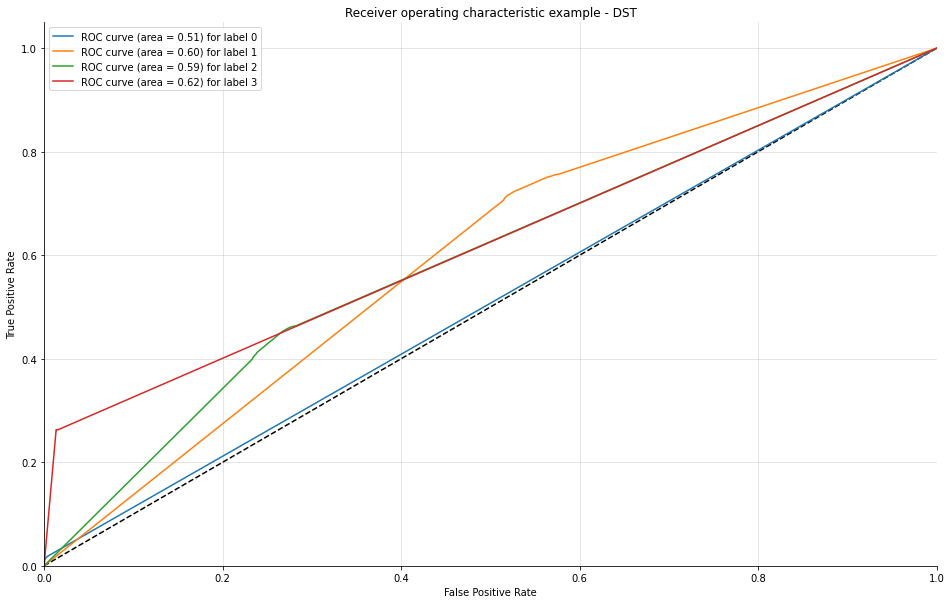

In [0]:
 #structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_scores_dst[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example - DST')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[     1    121     49      1]
 [   144 247809  78356   3825]
 [    54  83628  60535   2539]
 [     2   3490   2336   2045]]


====Classification Report====


              precision    recall  f1-score   support

           1       0.00      0.01      0.01       172
           2       0.74      0.75      0.75    330134
           3       0.43      0.41      0.42    146756
           4       0.24      0.26      0.25      7873

    accuracy                           0.64    484935
   macro avg       0.35      0.36      0.36    484935
weighted avg       0.64      0.64      0.64    484935



# Model - KNN Algorithm

In [0]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA

In [0]:
from sklearn.model_selection import train_test_split
RSEED = 30

X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Severity', axis=1), finalDf['Severity'], test_size=0.33, random_state=66)

In [0]:
def evaluate_classifier(clf, data, target, split_ratio):
    X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(X_train, y_train)
    return clf.score(X_test,y_test)



In [0]:
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (984565, 15)
y_train shape: (984565,)
X_test shape: (484935, 15)
y_test shape: (484935,)


In [0]:
clf = knn(n_jobs=-1,n_neighbors=6,weights='uniform')
y_score = clf.fit(X_train, y_train).predict(X_test)

In [0]:
a = clf.score(X_train, y_train)
a


In [0]:
b = clf.score(X_test, y_test)
b


0.6806231763019787

In [0]:
b

0.6806231763019787

In [0]:
pred1 = clf.predict(X_test)

In [0]:
y_score

array([2, 2, 2, ..., 2, 2, 2])

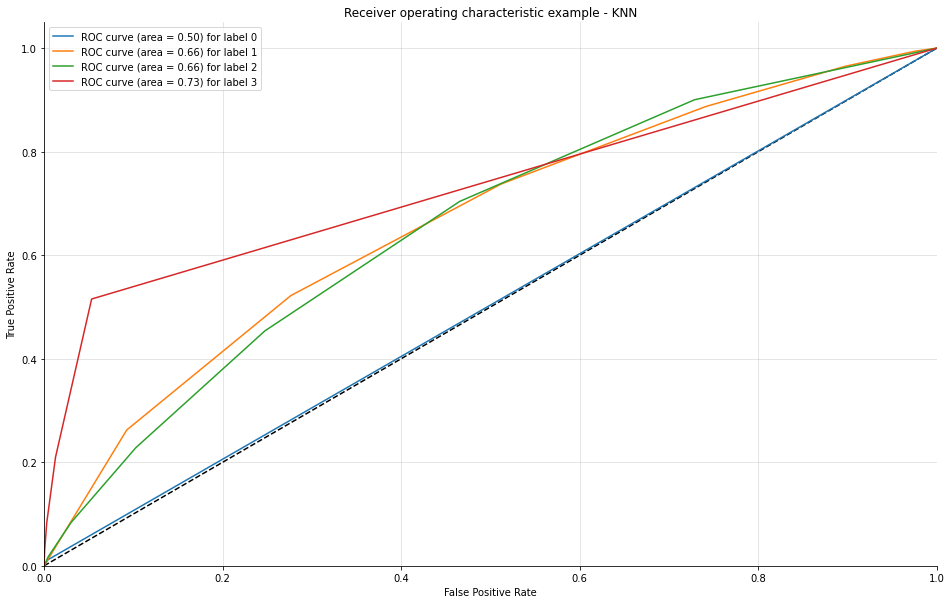

In [0]:
 #structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example - KNN')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [0]:

from sklearn.metrics import roc_auc_score
y_prob = clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.624332 (macro),
0.633625 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.639656 (macro),
0.663201 (weighted by prevalence)


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,pred1))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,pred1))

====Confusion Matrix=====


[[     0    150     22      0]
 [     0 293627  35984    523]
 [     0 110261  35928    567]
 [     0   5317   2048    508]]


====Classification Report====


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       172
           2       0.72      0.89      0.79    330134
           3       0.49      0.24      0.33    146756
           4       0.32      0.06      0.11      7873

    accuracy                           0.68    484935
   macro avg       0.38      0.30      0.31    484935
weighted avg       0.64      0.68      0.64    484935



- Here we have used KNN to plot accuracy from KNN clusters being from 1-25 all of them give same accuracy, please refer below array to see the accuracy value.


# Model - Logistic Regression


In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [0]:
logreg = LogisticRegression()
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

In [0]:
cnf_matrix = confusion_matrix(y_test, y_pred,labels=[1,2,3,4])

In [0]:
print(cnf_matrix)

[[     0    172      0      0]
 [     0 327945   2158     31]
 [     0 143791   2848    117]
 [     0   6973    875     25]]


In [0]:

from sklearn.metrics import roc_auc_score
y_prob = logreg.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.631569 (macro),
0.619453 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.639319 (macro),
0.635955 (weighted by prevalence)


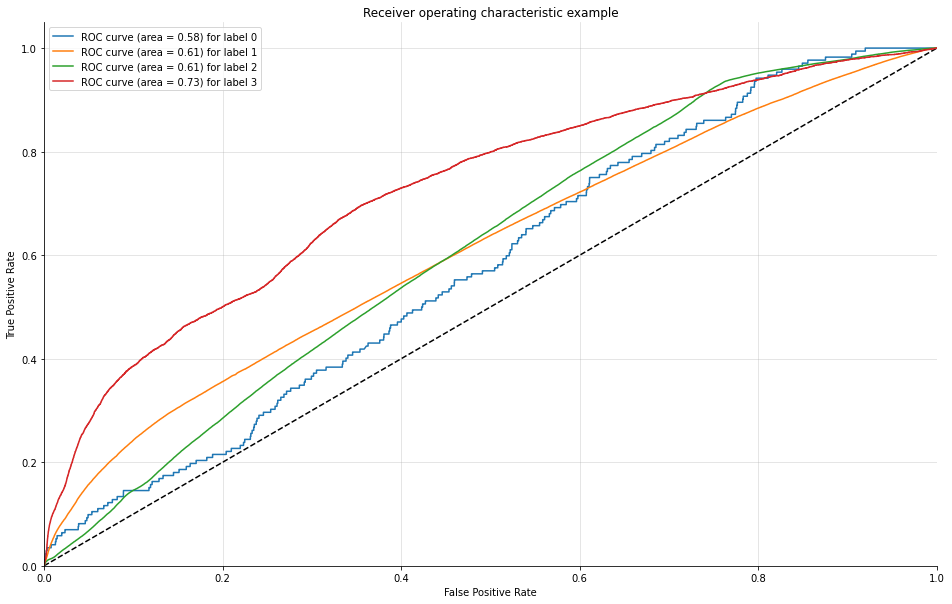

In [0]:

# structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic - Logistic Regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [0]:
o = np.array(y_train)

In [0]:
pd.value_counts(o)

2    671623
3    296865
4     15750
1       327
dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import metrics
from sklearn import metrics

#data['pred'] = result.predict(data[train_cols])

fpr, tpr, thresholds = metrics.roc_curve(y_pred, scores, pos_label=2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr = metrics.roc_score(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<function ndarray.view>

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[     0    172      0      0]
 [     0 327945   2158     31]
 [     0 143791   2848    117]
 [     0   6973    875     25]]


====Classification Report====


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       172
           2       0.68      0.99      0.81    330134
           3       0.48      0.02      0.04    146756
           4       0.14      0.00      0.01      7873

    accuracy                           0.68    484935
   macro avg       0.33      0.25      0.21    484935
weighted avg       0.62      0.68      0.56    484935



                                 ******* END OF NOTEBOOK *****

---

